# Assignment 5

## Roll no: 170010009

Folder "rvm_gif" contains gif simulation for 25 seconds it was simulated earlier the final arrays are also saved in that folder. use "plotter.py" to get given gif file.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import time
import sys
from numba import njit, prange
import cmath
import math
from scipy.signal import savgol_filter
import vortex_sim as vsim
import panel as pn 
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML

# plt.rcParams["figure.figsize"]=15, 15


def animator_for_patch(pos1, pos2, dist, name):
#     plt.style.use('seaborn-pastel')
    plt.style.use("dark_background")
    
    fig = plt.figure()
    ax = plt.axes(xlim=(-2, dist), ylim=(-4, 4)) #xlim=(-dist, dist), ylim=(-dist, dist)
    ax.set_aspect("equal")
    plt.title(name)
    tcir=np.linspace(0,2*np.pi, 100)
    plt.plot(np.cos(tcir), np.sin(tcir))
    # ax.set_facecolor('#000000')
    # ax.patch.set_facecolor('#000000')
    lines=[ax.plot([], [],"r.", ms=2)[0], ax.plot([], [], "b.", ms=2)[0]]

    def init():
        for line in lines:
            line.set_data([],[])
        return lines    

    def animate(i):
        lines[0].set_data(pos1[i].real, pos1[i].imag)
        lines[1].set_data(pos2[i].real, pos2[i].imag)
        return lines


    
    anim = FuncAnimation(fig, animate, init_func=init,
                                 frames=len(pos1)-2, interval= 80, blit=True)

    anim.save("rvm_gif/"+name+".gif", writer='imagegick') #replace name


@njit
def discritize(vel, gamma_panel, panels, cpt, gmax):
    N=0
    
    l=np.abs(panels[0]-panels[1])
    
    Gamma_n=np.zeros(len(cpt))
    for i in prange(len(cpt)-1):
        Gamma_n[i]=(gamma_panel[i]+gamma_panel[i+1])/2.#*np.abs((panels[i+1]-panels[i]))/2
        N= N+int((math.floor(np.abs((Gamma_n[i]/gmax)))))
        # print(N, math.floor(np.abs((Gamma_n[i]/gmax))))
    
    Gamma_n[-1]=(gamma_panel[0]+gamma_panel[-1])*np.abs((panels[0]-panels[-1]))/2
    N= N+int((math.floor(np.abs((Gamma_n[-1]/gmax)))))

    # print(Gamma_n)
    blobs=np.zeros(N+1)
    pos=np.zeros(N+1, np.complex128)
    iter=0
    for i in prange(len(gamma_panel)-1):
        if Gamma_n[i]>0:
            for j in prange(int(math.floor(np.abs((Gamma_n[i]/gmax))))):
                blobs[iter]=gmax*np.abs(panels[i+1]-panels[i])
                pos[iter]=cpt[i]
                iter+=1

        else:
            for j in prange(int(math.floor(np.abs((Gamma_n[i]/gmax))))):
                blobs[iter]=-gmax*np.abs(panels[i+1]-panels[i])
                pos[iter]=cpt[i]
                iter+=1

    if Gamma_n[-1]>0:
        for j in prange(int(math.floor(np.abs((Gamma_n[-1]/gmax))))):
            blobs[iter]=gmax*np.abs(panels[0]-panels[-1])
            pos[iter]=cpt[-1]
            iter+=1

    else:
        for j in prange(int(math.floor(np.abs((Gamma_n[-1]/gmax))))):
            blobs[iter]=-gmax*np.abs(panels[0]-panels[-1])
            pos[iter]=cpt[-1]
            iter+=1

       

    # blobs=np.empty(0,dtype=np.float32)
    # pos=np.empty(0, dtype=np.complex128)
    # n=0
    # for i in prange(len(gamma_panel)-1):
    #     n= int(math.floor(np.abs((Gamma_n[i]/gmax))))
    #     temp=np.ones(n)*gmax*np.abs(panels[i]-panels[i+1])*np.sign(Gamma_n[i])
    #     temp_p=np.zeros(n, np.complex128)+cpt[i]
    #     blobs=np.hstack((blobs, temp))
    #     pos=np.hstack((pos, temp_p))

    # n= int(math.floor(np.abs((Gamma_n[i]/gmax))))
    # temp=np.ones(n)*gmax*np.abs(panels[i]-panels[i+1])*np.sign(Gamma_n[i])
    # temp_p=np.zeros(n, np.complex128)+cpt[i]
    # blobs=np.hstack((blobs, temp))
    # pos=np.hstack((pos, temp_p))



    # t=get_tangent(panels)
    # v_dot_t=vel.real*t.real+vel.imag*t.imag
    # # print("vt", v_dot_t)
    # n_blobs_at_loc=np.zeros(len(cpt))
    # reminder=np.zeros(len(cpt))
    # for i in prange(len(cpt)):
    #     if v_dot_t[i]>0:
    #         n_blobs_at_loc[i]=math.floor(np.abs(v_dot_t[i]/gmax))
    #         reminder[i]= (np.abs(v_dot_t[i]/gmax)) - math.floor(np.abs(v_dot_t[i]/gmax))
    #     else:
    #         n_blobs_at_loc[i]= max(math.floor(np.abs(v_dot_t[i]/gmax))-1, 0)
    #         reminder[i]= 1- ( (np.abs(v_dot_t[i]/gmax)) - math.floor(np.abs(v_dot_t[i]/gmax)) )

    # # print(n_blobs_at_loc)
    # l=np.abs(panels[0]-panels[1])
    # blobs=np.zeros(int(np.sum(n_blobs_at_loc))) # + gmax*(np.abs(panels[0]-panels[1]))
    # pos=np.zeros(int(np.sum(n_blobs_at_loc)), np.complex128)
    # iter=0
    # for i in prange(len(cpt)):
    #     if v_dot_t[i]>0:
    #         for j in prange(int(n_blobs_at_loc[i])):
    #             pos[iter]=cpt[i]
    #             blobs[iter]=gmax*l
    #             iter+=1
    #     if v_dot_t[i]<=0:
    #         for j in prange(int(n_blobs_at_loc[i])):
    #             pos[iter]=cpt[i]
    #             blobs[iter]=-gmax*l
    #             iter+=1
    # # blobs=np.hstack((blobs, reminder*l))
    # # pos= np.hstack((pos, cpt))

    return blobs, pos
        
@njit
def advect(v_pos_new, v_gamma_new, v_pos, v_gamma, delta, panel_pos, panel_gamma, v_inf, dt, cpt, cpt_b, gmax):
    vp=0
    vv=0
    vv=vsim.vel_chorin(np.hstack((v_pos, v_pos_new)), np.hstack((v_gamma, v_gamma_new)), delta, v_pos)
    vp=pn.vel_due_to_panel(panel_pos, panel_gamma, v_pos)

    v0=vv+vp+v_inf
    # print(v0)
    # plt.quiver(v_pos.real, v_pos.imag, v0.real, v0.imag+deltadelta
    s1=vsim.euler(v0, v_pos, dt)
    panel_gamma1, v_gamma_new1, v_pos_new1= get_p_and_b(s1, v_gamma, delta, v_inf, cpt, cpt_b, panel_pos, gmax)
    vv=vsim.vel_chorin(np.hstack((s1, v_pos_new1)), np.hstack((v_gamma, v_gamma_new1)), delta, s1)
    vp=pn.vel_due_to_panel(panel_pos, panel_gamma1, s1)
    v1=vv+vp+v_inf
    v_pos=vsim.rk2(v0, v1, v_pos, dt)
    return(v_pos)


@njit
def get_tangent(panels):
    t=np.zeros_like(panels)
    for i in prange(len(panels)-1):
        t[i]=(panels[i+1]-panels[i])/np.abs(panels[i+1]-panels[i])
    t[-1]=(panels[0]-panels[-1])/np.abs(panels[0]-panels[-1])
    return t

@njit
def get_p_and_b(b_pos, b_gamma, delta, v_inf, cpt,cpt_b, panels, gmax):

    vel_b= vsim.vel_chorin(b_pos, b_gamma, delta, cpt, 0)
    
    # vel_b2= vsim.vel_chorin(b_pos, b_gamma, delta, cpt_b, 0)
    
    gamma_panel=pn.get_gamma_linear_panels(cpt, panels, vel_b+v_inf)
    vel_p=0

    # vel_p=pn.vel_due_to_panel(panels, gamma_panel, cpt)

    b_gamma_new, b_pos_new = discritize(vel_p+ v_inf + vel_b, gamma_panel, panels, cpt_b, gmax)

    return gamma_panel, b_gamma_new, b_pos_new



@njit
def diffuse(vor_pos, nu, dt):
    new_pos=vor_pos+( np.random.normal(0.0,np.sqrt(2*nu*dt), len(vor_pos)  ) + 1j*np.random.normal(0.0,np.sqrt(2*nu*dt), len(vor_pos)  ) )
    return new_pos


@njit
def reflect(pos, R=1.):
    for i in prange(len(pos)):
        if (np.abs(pos[i])<R) * (np.abs(pos[i])>(R/1.5)) >0:
            pos[i]=pos[i]*(2*R-np.abs(pos[i]))/np.abs(pos[i])

@njit
def initialize(v_inf, dt, nu, gmax, npan):
    panels=pn.get_panels_circle(1,0,0,npan)

    delta=np.abs(panels[1]-panels[2])/(np.pi)
    print(delta)

    # panels_b=pn.get_panels_circle(1, 0, 0, npan)
    cpt=pn.control_pt(panels, 0.5)
    cpt_b=cpt*((np.abs(cpt)+delta)/np.abs(cpt))

    
    #initialize
    gamma_panel=pn.get_gamma_linear_panels(cpt, panels, np.array([v_inf]*len(cpt)))
    # print(gamma_panel)
    vel_p=pn.vel_due_to_panel(panels, gamma_panel, cpt)
    b_gamma, b_pos=discritize(vel_p + v_inf ,gamma_panel, panels, cpt_b, gmax)
    b_pos=diffuse(b_pos, nu, dt)
    print(len(b_pos))
    reflect(b_pos)
    
    return panels, cpt, cpt_b, delta, b_pos, b_gamma 
    


@njit
def one_iter(v_inf, dt, nu, gmax, npan, b_pos, b_gamma, cpt, cpt_b, delta):
    
    

    # for i in prange(iter):
    gamma_panel, b_gamma_new, b_pos_new = get_p_and_b(b_pos, b_gamma, delta, v_inf, cpt, cpt_b, panels, gmax)
    # print(gamma_panel)
    # plt.plot(b_pos.real, b_pos.imag, "b.")
    b_pos=advect(b_pos_new ,b_gamma_new ,b_pos, b_gamma, delta, panels, gamma_panel, v_inf, dt, cpt, cpt_b, gmax)

    reflect(b_pos)
    # plt.plot(b_pos.real, b_pos.imag, "r.")
    # plt.plot(b_pos_new.real, b_pos_new.imag, "g.")

    b_pos=np.hstack((b_pos, b_pos_new))

    b_gamma=np.hstack((b_gamma, b_gamma_new))
    print(len(b_pos))
    # print("iter", i+1, "\t#blob",len(b_pos))
    # plt.plot(b_pos.real, b_pos.imag, "r.")

    b_pos=diffuse(b_pos, nu, dt)
    reflect(b_pos, 1)

    return b_pos, b_gamma
        
@njit
def calc_I(b_pos, b_gamma):
    return -1j*np.sum(b_pos*b_gamma)
    

    
def vel_quiver(all_pos_p, all_pos_n, instant, delta, v_inf, cpt, cpt_b, panels, gmax):
    l=np.abs(panels[0]-panels[1])
    b_pos=np.hstack((all_pos_p[instant], all_pos_n[instant]))
    g1=np.ones(len(all_pos_p[instant]))*gmax*l
    g2=np.ones(len(all_pos_n[instant]))*gmax*l*(-1)
    b_gamma=np.hstack((g1, g2))


    x=np.linspace(-2,2,30)
    y=np.linspace(-2,2,30)
    # y=np.zeros(15)+0.001
    x,y=np.meshgrid(x,y)
    mat=np.hstack(x)+1j*np.hstack(y)

    gamma_panel, b_gamma_new, b_pos_new = get_p_and_b(b_pos, b_gamma, delta, v_inf, cpt, cpt_b, panels, gmax)
    v1=vsim.vel_chorin(np.hstack((b_pos, b_pos_new)), np.hstack((b_gamma, b_gamma_new)), delta, mat, self_vel=0)
    v2=pn.vel_due_to_panel(panels, gamma_panel, mat)
    v=v1+v2+v_inf
    # ts=mat
    ts=np.reshape(v, (30,30))
    plt.figure(figsize=(12,12))
    plt.quiver(x, y, ts.real, ts.imag)
    plt.show()


    
def vel_quiver2(all_pos_p, all_pos_n, instant, delta, v_inf, cpt, cpt_b, panels, gmax):
    l=np.abs(panels[0]-panels[1])
    b_pos=np.hstack((all_pos_p[instant], all_pos_n[instant]))
    g1=np.ones(len(all_pos_p[instant]))*gmax*l
    g2=np.ones(len(all_pos_n[instant]))*gmax*l*(-1)
    b_gamma=np.hstack((g1, g2))


    x=np.linspace(0.0001,2,21)
    y=np.linspace(0.0001,2,21)
    # y=np.zeros(15)+0.001
    x,y=np.meshgrid(x,y)
    mat=np.hstack(x)+1j*np.hstack(y)

    gamma_panel, b_gamma_new, b_pos_new = get_p_and_b(b_pos, b_gamma, delta, v_inf, cpt, cpt_b, panels, gmax)
    v1=vsim.vel_chorin(np.hstack((b_pos, b_pos_new)), np.hstack((b_gamma, b_gamma_new)), delta, mat, self_vel=0)
    v2=pn.vel_due_to_panel(panels, gamma_panel, mat)
    v=v1+v2+v_inf
    # ts=mat
    ts=np.reshape(v, (21,21))
    plt.figure(figsize=(12,12))
    plt.quiver(x, y, ts.real, ts.imag)
    plt.show()


def plot_instant(all_pos_p, all_pos_n, instant):
    plt.figure(figsize=(12,12))
    plt.axes().set_aspect("equal")
    tcir=np.linspace(0,2*np.pi, 100)
    plt.plot(np.cos(tcir), np.sin(tcir))
    
    plt.plot(all_pos_p[instant].real, all_pos_p[instant].imag, "r.", ms=5)
    plt.plot(all_pos_n[instant].real, all_pos_n[instant].imag, "b.", ms=5)
    plt.show()

In [2]:
v_inf=1+0j
dt=0.05
nu=1/500.
gmax=0.1
npan=50
iter=100

name="dt"+str(dt)+ "nu"+ str(nu)+ "gmax"+str(gmax)+ "npan"+str(npan)+"iter"+str(iter)


all_pos_p=np.empty(iter+1, np.object)
all_pos_n=np.empty(iter+1, np.object)
I=np.zeros(iter+1, np.complex128)

panels, cpt, cpt_b, delta, b_pos, b_gamma =initialize(v_inf, dt, nu, gmax, npan)
all_pos_p[0]=b_pos[b_gamma>0]
all_pos_n[0]= b_pos[b_gamma<0]
I[0]=calc_I(b_pos, b_gamma)

for i in prange(iter):
    print("iter "+str(i)+"\t#", end=" ")
    b_pos, b_gamma=one_iter(v_inf, dt, nu, gmax, npan, b_pos, b_gamma, cpt, cpt_b, delta)
    all_pos_p[i+1]=b_pos[b_gamma>0]
    all_pos_n[i+1]= b_pos[b_gamma<0]
    I[i+1]=calc_I(b_pos, b_gamma)

# I=savgol_filter(I, 11, 3)
Iprime=I[1::]
# F=(I[:-1]-Iprime)/dt

F=-np.gradient(I)/dt

lift=F.imag
drag=F.real

0.03997368624959366
610
iter 0	# 651
iter 1	# 701
iter 2	# 718
iter 3	# 764
iter 4	# 814
iter 5	# 864
iter 6	# 916
iter 7	# 989
iter 8	# 1057
iter 9	# 1115
iter 10	# 1186
iter 11	# 1263
iter 12	# 1306
iter 13	# 1363
iter 14	# 1427
iter 15	# 1481
iter 16	# 1542
iter 17	# 1612
iter 18	# 1684
iter 19	# 1770
iter 20	# 1841
iter 21	# 1909
iter 22	# 1975
iter 23	# 2025
iter 24	# 2092
iter 25	# 2137
iter 26	# 2197
iter 27	# 2250
iter 28	# 2303
iter 29	# 2363
iter 30	# 2420
iter 31	# 2458
iter 32	# 2504
iter 33	# 2549
iter 34	# 2601
iter 35	# 2665
iter 36	# 2742
iter 37	# 2813
iter 38	# 2863
iter 39	# 2930
iter 40	# 2993
iter 41	# 3056
iter 42	# 3125
iter 43	# 3187
iter 44	# 3257
iter 45	# 3314
iter 46	# 3383
iter 47	# 3452
iter 48	# 3523
iter 49	# 3582
iter 50	# 3646
iter 51	# 3712
iter 52	# 3795
iter 53	# 3852
iter 54	# 3915
iter 55	# 3983
iter 56	# 4048
iter 57	# 4144
iter 58	# 4200
iter 59	# 4271
iter 60	# 4339
iter 61	# 4406
iter 62	# 4481
iter 63	# 4555
iter 64	# 4626
iter 65	# 4681
iter

In [3]:
#run this cell to get gif of simulation in current directory

# animator_for_patch(all_pos_p, all_pos_n, 15, name)

## Blob positions at 1,2,3,4,5 sec respectively

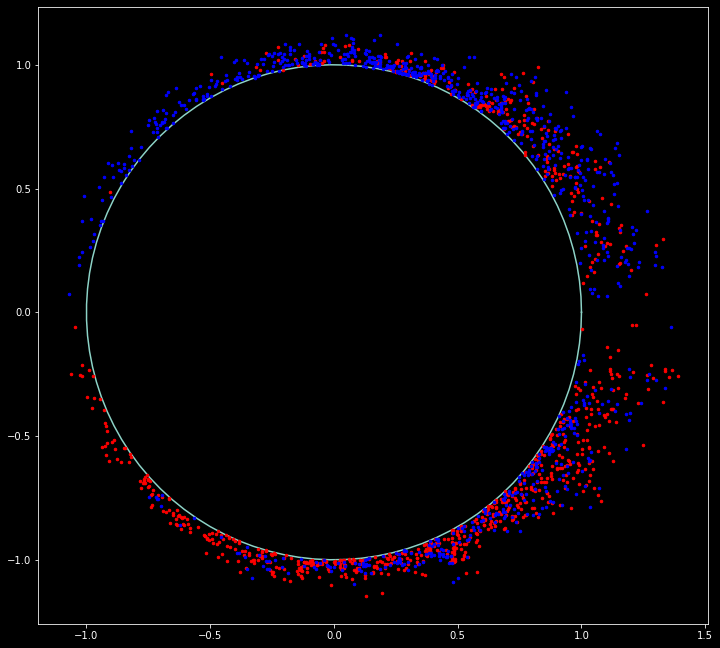

In [15]:
plt.style.use("dark_background")

plot_instant(all_pos_p, all_pos_n, 20)

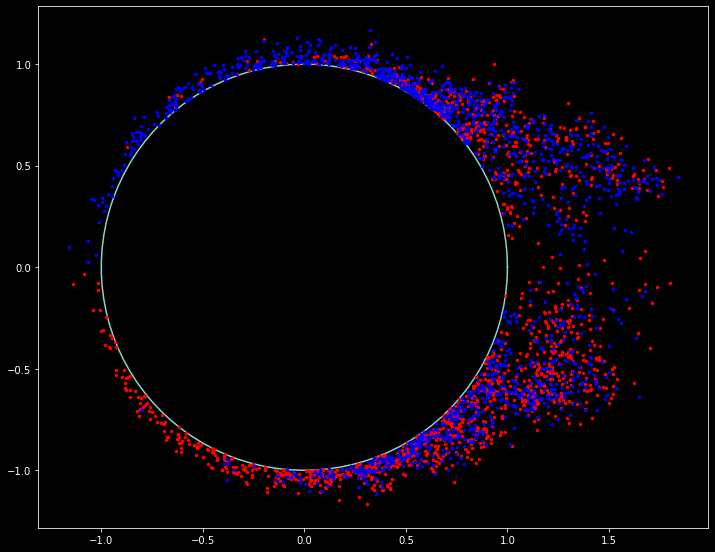

In [16]:
plot_instant(all_pos_p, all_pos_n, 40)

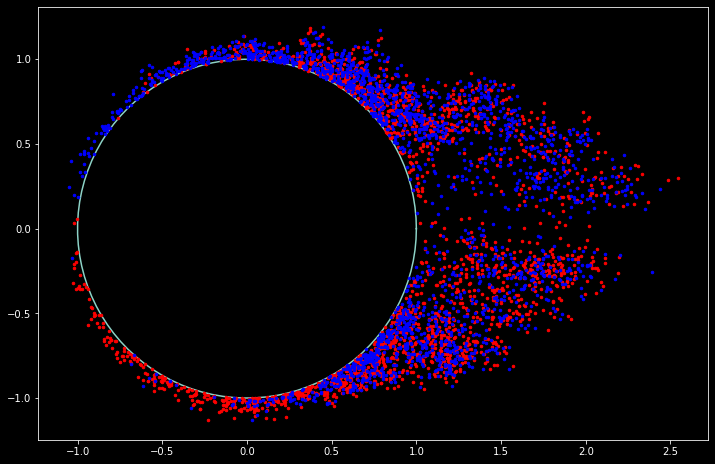

In [17]:
plot_instant(all_pos_p, all_pos_n, 60)

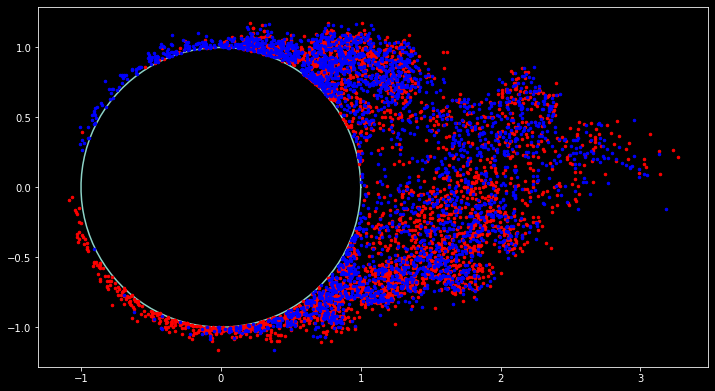

In [18]:
plot_instant(all_pos_p, all_pos_n, 80)

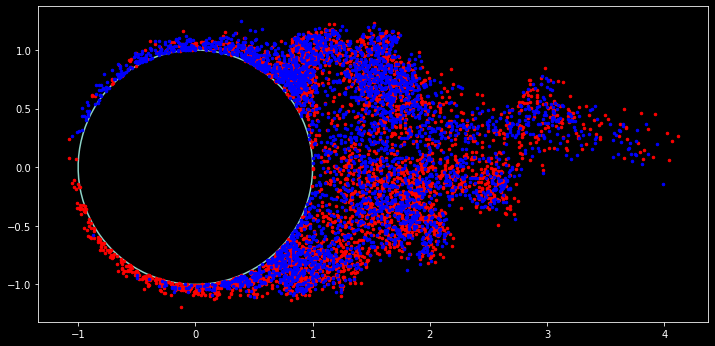

In [19]:
plot_instant(all_pos_p, all_pos_n, 100)

## Velocity field at 1,2,3,4,5 sec respectively

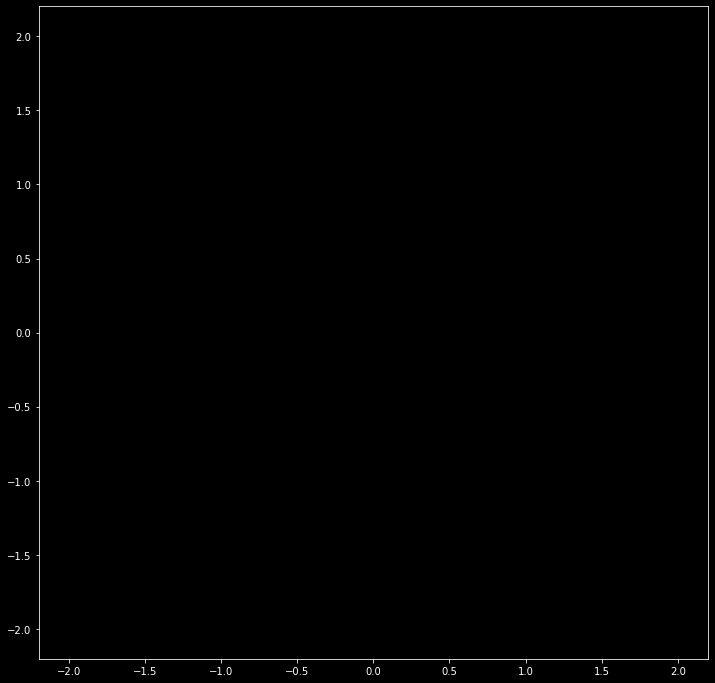

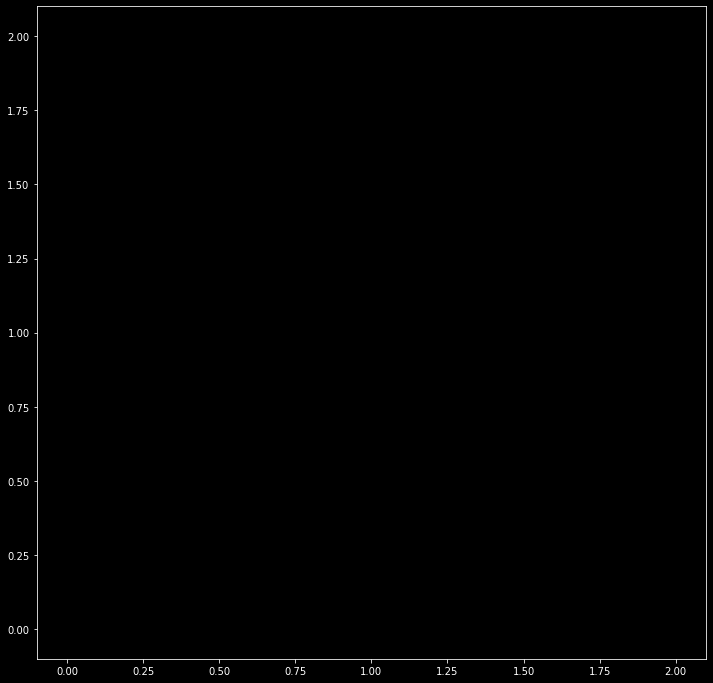

In [20]:
vel_quiver(all_pos_p, all_pos_n, 20, delta, v_inf, cpt, cpt_b, panels, gmax)
vel_quiver2(all_pos_p, all_pos_n, 20, delta, v_inf, cpt, cpt_b, panels, gmax)

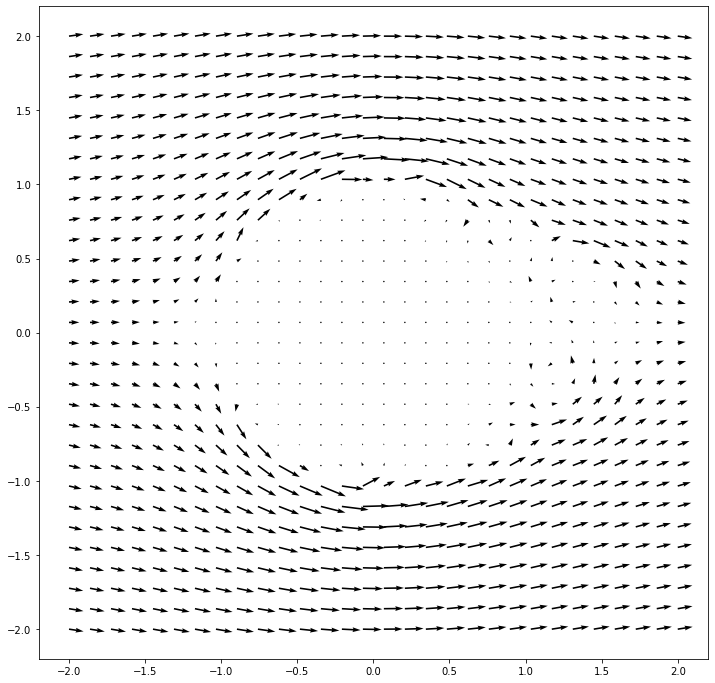

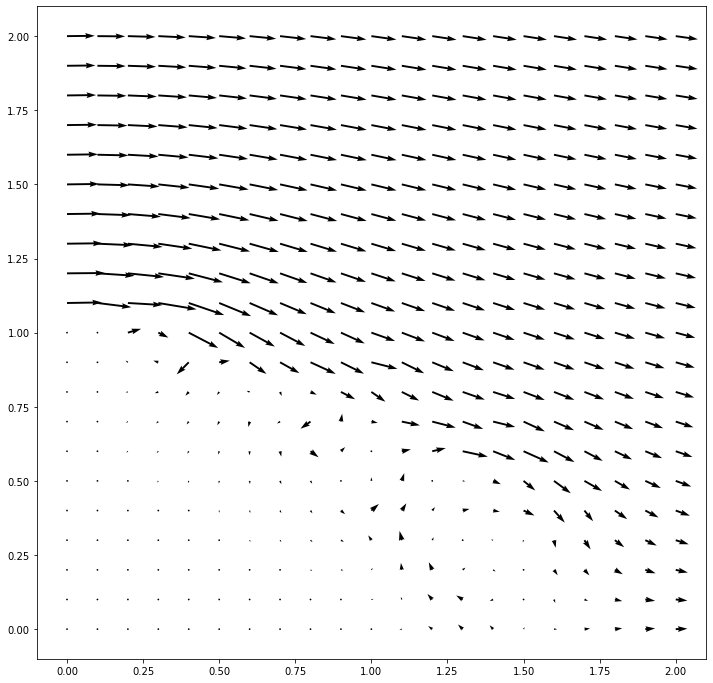

In [10]:
vel_quiver(all_pos_p, all_pos_n, 40, delta, v_inf, cpt, cpt_b, panels, gmax)
vel_quiver2(all_pos_p, all_pos_n, 40, delta, v_inf, cpt, cpt_b, panels, gmax)

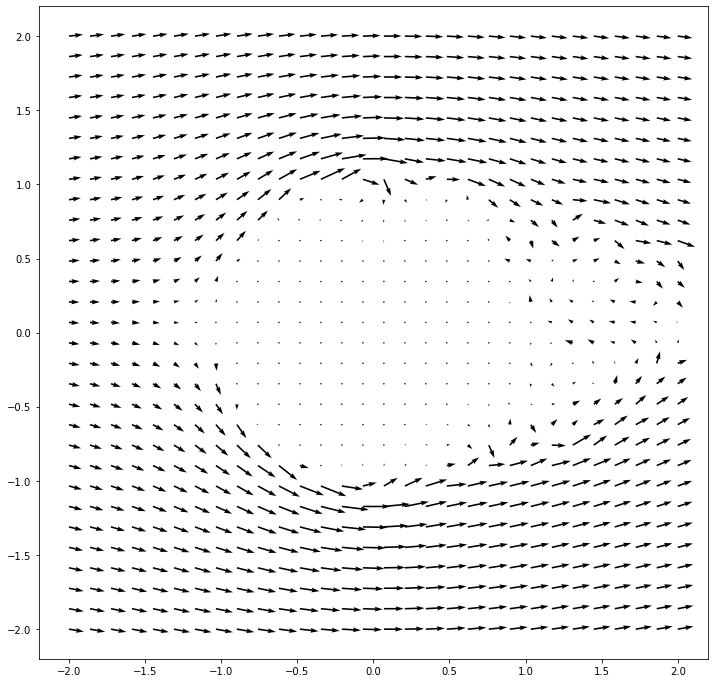

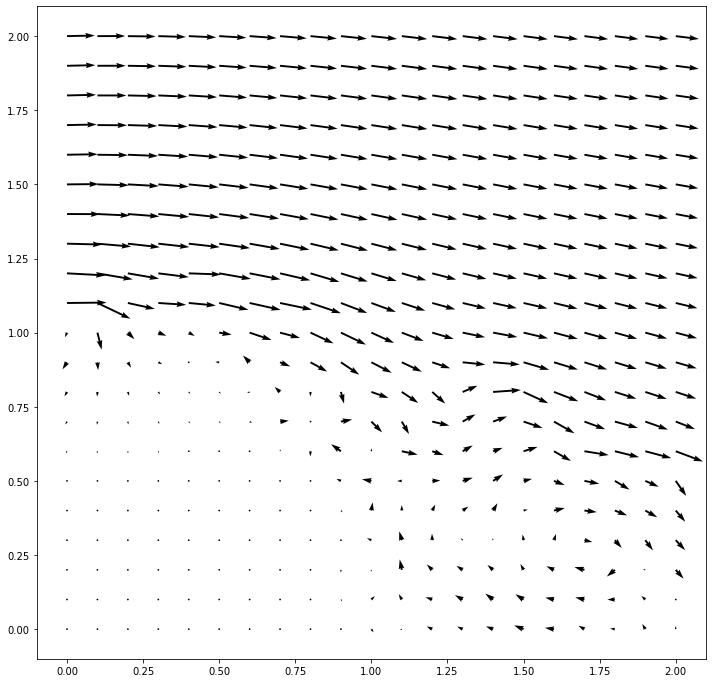

In [11]:
vel_quiver(all_pos_p, all_pos_n, 60, delta, v_inf, cpt, cpt_b, panels, gmax)
vel_quiver2(all_pos_p, all_pos_n, 60, delta, v_inf, cpt, cpt_b, panels, gmax)

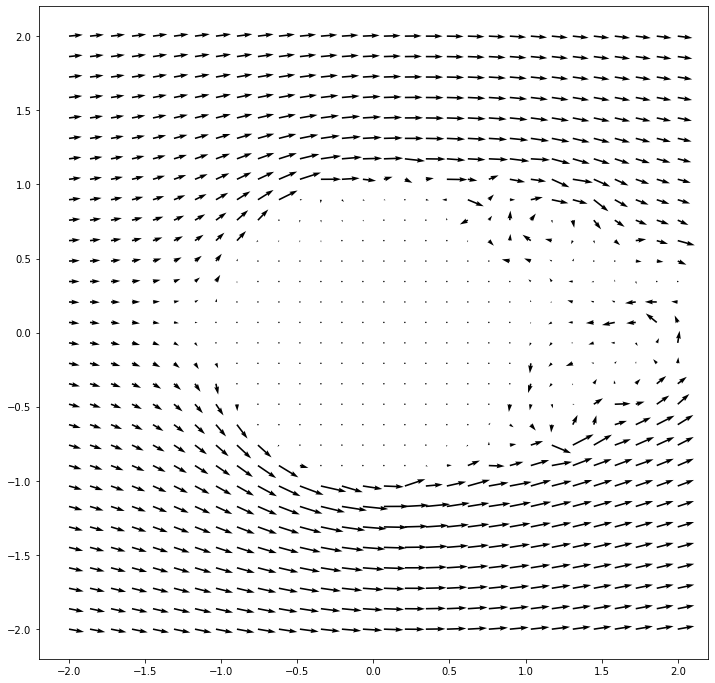

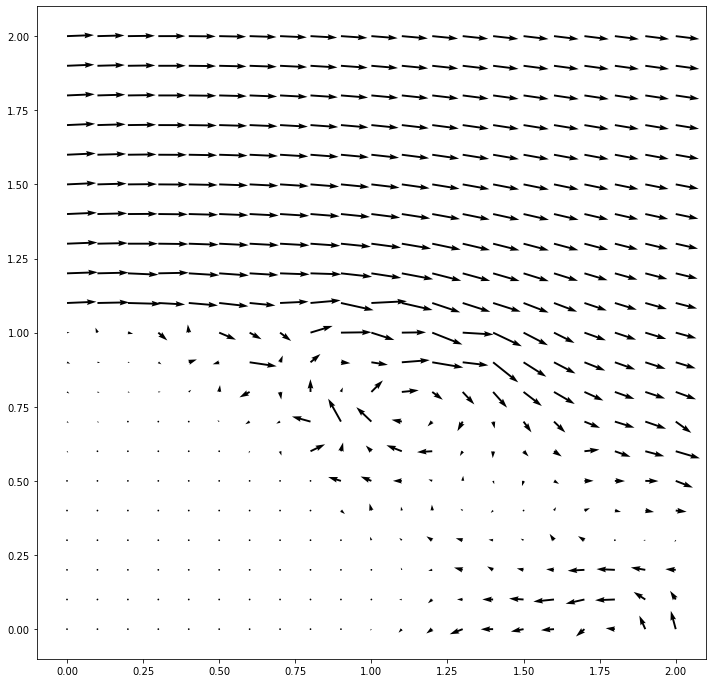

In [12]:
vel_quiver(all_pos_p, all_pos_n, 80, delta, v_inf, cpt, cpt_b, panels, gmax)
vel_quiver2(all_pos_p, all_pos_n, 80, delta, v_inf, cpt, cpt_b, panels, gmax)

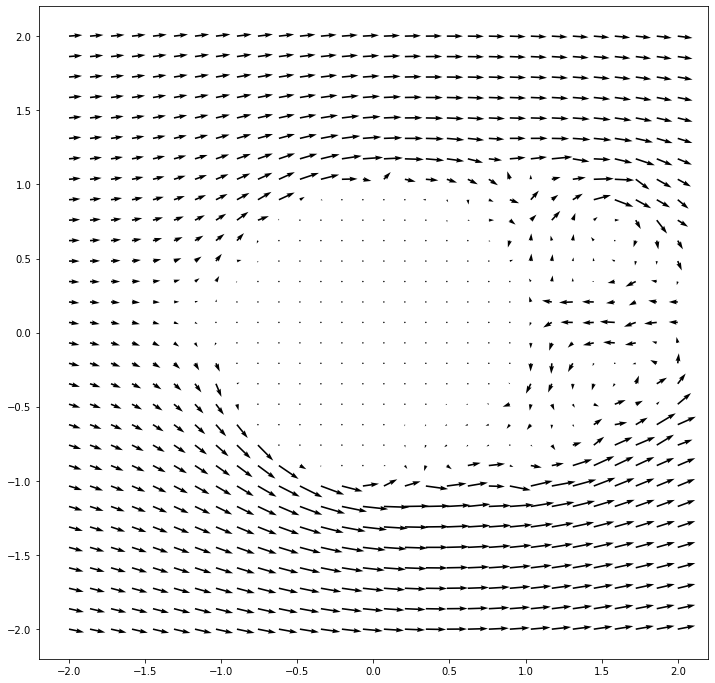

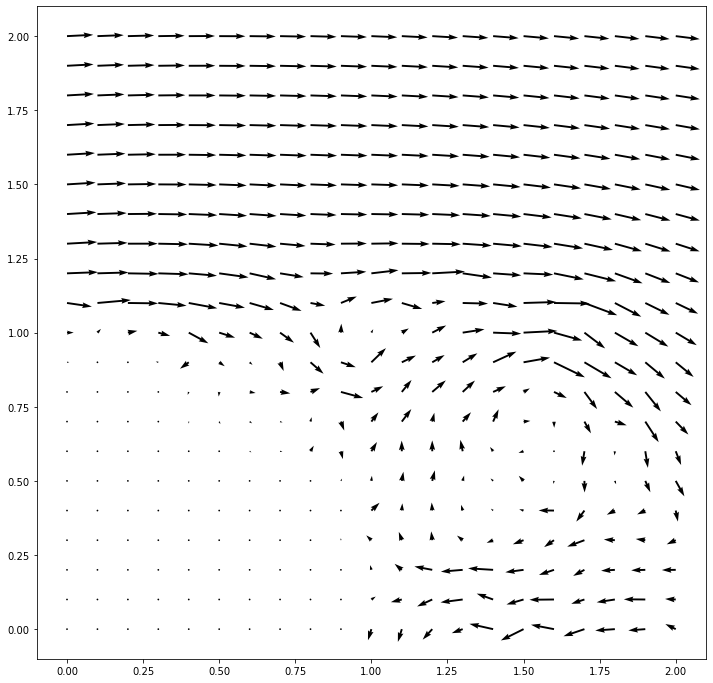

In [13]:
vel_quiver(all_pos_p, all_pos_n, 100, delta, v_inf, cpt, cpt_b, panels, gmax)
vel_quiver2(all_pos_p, all_pos_n, 100, delta, v_inf, cpt, cpt_b, panels, gmax)

## Cd vs time

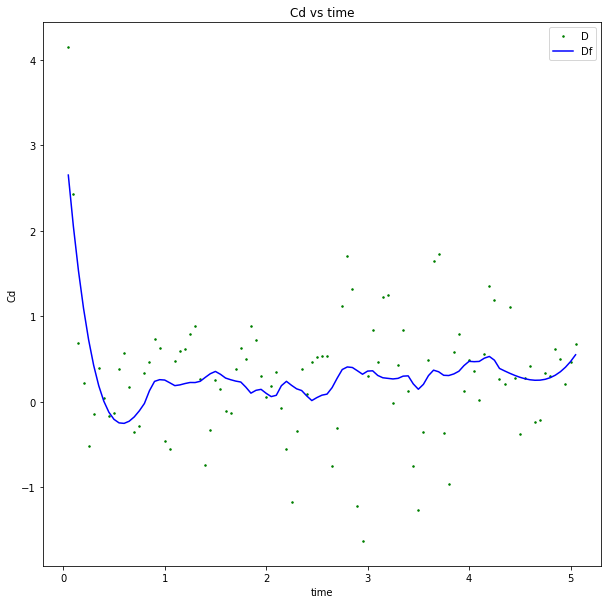

In [14]:
plt.figure(figsize=(10,10))
plt.plot(np.array(range(1,iter+2))*dt, drag/2., "g.", label="D", ms=3)
plt.plot(np.array(range(1,iter+2))*dt, savgol_filter(drag, 31, 3)/2., "b", label="Df")
plt.legend()
plt.title("Cd vs time")
plt.xlabel("time")
plt.ylabel("Cd")
plt.show()